In [28]:
#Capstone Two: modeling
#Created on October 20, 2022

In [29]:
#Import necessary packages
import pandas as pd
pd.options.display.max_columns=10000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
allresults = []

In [31]:
#Import and view train data set using read_csv
df = pd.read_csv('../data/clean_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [32]:
df.shape

(1459, 81)

In [33]:
#Look at the data summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.110350,56.895134,57.448252,10480.248115,6.096642,5.575737,1971.242632,1984.849897,102.642221,440.075394,46.581220,567.309801,1053.966415,1160.207676,346.579164,5.848526,1512.635367,0.424263,0.057574,1.564770,0.382454,2.866347,1.046607,6.514051,0.611378,1.766964,472.332419,94.162440,46.492118,21.969157,3.411926,15.071282,2.431803,43.518849,6.325565,2007.815627,180935.535298
std,421.491515,42.314997,34.024651,9886.304813,1.379691,1.113079,30.197931,20.643591,179.879763,435.438756,161.369977,442.010504,418.417408,375.503916,436.392263,48.639512,514.423754,0.517447,0.238830,0.550987,0.502798,0.816050,0.220410,1.619595,0.641848,0.747546,212.440386,125.342512,65.966356,61.137400,29.327247,55.775138,38.196894,496.291826,2.700957,1.328542,79467.851763
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,42.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.500000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,63.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,712.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
#Import LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [35]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [36]:
print(LinearRegression.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.

        .. deprecated:: 1.0
           `normalize` was deprecate

In [37]:
LinearRegression?

In [38]:
LinearRegression??

In [39]:
LinearRegression()

LinearRegression()

In [40]:
#create model
model = LinearRegression()

In [41]:
#Fit the model to both variables of interest
model.fit(X=df[['LotArea']], y=df['SalePrice'])

LinearRegression()

In [42]:
#Use Lot Area data to predict 
y_pred = model.predict(X=df[['LotArea']])
y_pred

array([176570.87556039, 179043.16387874, 182590.36016158, ...,
       177843.56659036, 179294.69234243, 179767.65184681])

Text(0, 0.5, 'Actual price')

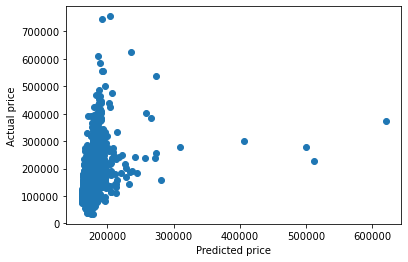

In [43]:
#Plot the predicted Sale Price with actual sale prices
plt.scatter(y_pred, df['SalePrice'])
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

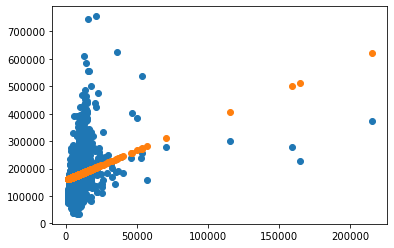

In [44]:
#Plot Lot Area and Sale price
#Add the line of fit
plt.scatter(df['LotArea'], df['SalePrice'])
plt.scatter(df['LotArea'], y_pred) 

In [45]:
#Calculate the error between actual vs predicted price
e = df['SalePrice'] - y_pred
e

0       31929.124440
1        2456.836121
2       40909.639838
3      -38935.673082
4       60938.693892
            ...     
1454     -425.023670
1455    23271.244175
1456    88656.433410
1457   -37169.692342
1458   -32267.651847
Name: SalePrice, Length: 1459, dtype: float64

In [46]:
#Take the mean of error
e.mean()

6.622667382889369e-12

In [47]:
#Calculate absolute mean of error 
e.abs()

0       31929.124440
1        2456.836121
2       40909.639838
3       38935.673082
4       60938.693892
            ...     
1454      425.023670
1455    23271.244175
1456    88656.433410
1457    37169.692342
1458    32267.651847
Name: SalePrice, Length: 1459, dtype: float64

In [48]:
#Calculate the mean absolute error
e.abs().mean() #MAE

55069.46015744531

In [49]:
#calculate RMSE
np.sqrt(np.mean((df['SalePrice'] - y_pred)**2))
#67% of predictions will fall within +/- $76,601

76546.71381485718

Text(0, 0.5, 'Error')

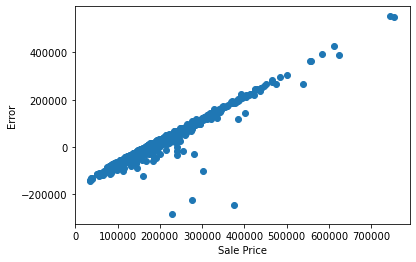

In [50]:
#Plot the Sale price against the error
plt.scatter(df['SalePrice'], e)
plt.xlabel('Sale Price')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

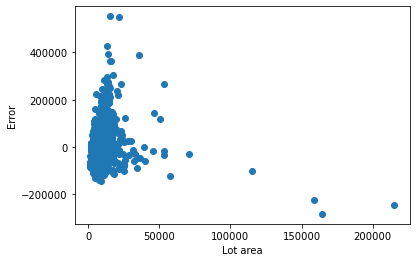

In [51]:
#Plot the Lot Area against the error and label axes
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')
#Larger homes are underestimated on Sale price

In [55]:
df['LotArea_squared'] = df['LotArea'] ** 2

In [ ]:
df

In [ ]:
featurenames = ['LotArea_squared']
df[featurename] = df['LotArea_squared']

In [ ]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
RMSE

In [ ]:
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')

In [ ]:
featurename = 'LotArea_gt_50000'
df[featurename] = df['LotArea'] < 50000

In [ ]:
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
results = dict(RMSE=RMSE, featurenames=featurenames, model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

In [ ]:
#Plot LotArea and Sale Price
df.plot(kind='scatter', x='LotArea', y='SalePrice')